Import what will be needed for the exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
import csv
import math
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import metrics
from tensorflow.keras.models import load_model

In [2]:
#load the dataset
loan_data = pd.read_csv('loan_data_clean.csv')

In [3]:
loan_data

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0.0,0,0,125,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3.0,0,0,275,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1.0,0,0,431,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2.0,0,0,422,0.0,187.000000,360.0,1.0,2,1


In [4]:
loan_data.shape

(614, 13)

Data Preparation

In [5]:
#save the dataset as an array of numerical values
loan_data_df = loan_data.values

In [6]:
loan_data_df

array([[  0.,   1.,   0., ...,   1.,   2.,   1.],
       [  1.,   1.,   1., ...,   1.,   0.,   0.],
       [  2.,   1.,   1., ...,   1.,   2.,   1.],
       ...,
       [611.,   1.,   1., ...,   1.,   2.,   1.],
       [612.,   1.,   1., ...,   1.,   2.,   1.],
       [613.,   0.,   0., ...,   0.,   1.,   0.]])

In [7]:
#Splitting the dataset into categories. The X category (containing 12 columns) will be used to predict the y category (containing 1 column)
X = loan_data_df[:,0:12]

In [8]:
y = loan_data_df[:,12]

In [9]:
y

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

In [10]:
X

array([[  0.,   1.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  2.,   1.,   1., ..., 360.,   1.,   2.],
       ...,
       [611.,   1.,   1., ..., 360.,   1.,   2.],
       [612.,   1.,   1., ..., 360.,   1.,   2.],
       [613.,   0.,   0., ..., 360.,   0.,   1.]])

In [11]:
#Scaling the dataset's X category columns to a smaller-range numerical values
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Split the dataset into training, testing and validation sets. 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(429, 12) (92, 12) (93, 12) (429,) (92,) (93,)


Building the Artificial Neural Network Model(s)

In [15]:
#THE ARCHITECTURE
#Defining A two-layer Neural Network each with 32 Neurons using the Rectified Linear Activation Function (ReLu)
#Pass onto the model the 12 columns of the X input category. 
loan_model = Sequential([
    Dense(32, activation='relu', input_shape=(12,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
loan_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [16]:
#OPTIMIZATION ALGORITHM FOR THE MODEL, MODEL LOSS FUNCTION, AND LOSS FUNCTION TRACKING METRIC
loan_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
predictions = loan_model.predict(X_val)

In [17]:
#TRAINING THE MODEL
hist = loan_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
14/14 [==============================] - 4s 45ms/step - loss: 0.6649 - accuracy: 0.6853 - val_loss: 0.6553 - val_accuracy: 0.7174
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6970 - val_loss: 0.6402 - val_accuracy: 0.7283
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.6900 - val_loss: 0.6270 - val_accuracy: 0.7283
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6291 - accuracy: 0.6830 - val_loss: 0.6176 - val_accuracy: 0.7174
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6219 - accuracy: 0.6807 - val_loss: 0.6081 - val_accuracy: 0.7174
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6148 - accuracy: 0.6807 - val_loss: 0.6003 - val_accuracy: 0.7174
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6092 - accuracy: 0.6807 - val_loss: 0.5940 - val_accuracy: 0.7174
Epoch 8/100


In [18]:
#EVALUATING THE MODEL'S PERFORMANCE
loan_model.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7312


0.7311828136444092

In [19]:
mean_absolute_error(Y_val, predictions)

0.48918555158635846

In [20]:
mean_squared_error(Y_val, predictions)
math.sqrt(mean_squared_error(Y_val, predictions))

0.4900882943768014

In [21]:
np.mean(Y_val)

0.717391304347826

In [22]:
np.mean(predictions)

0.5215529

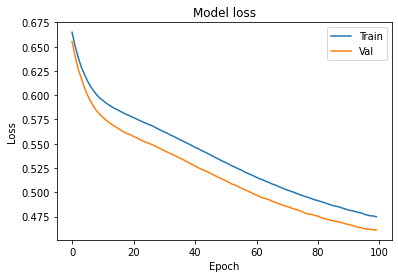

In [23]:
#VISUALIZATION OF THE TRAINING LOSS AND THE VALIDATION LOSS FOR THE MODEL
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

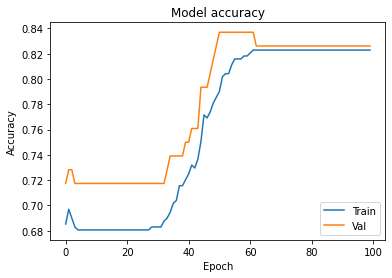

In [24]:
#VISUALIZATION OF THE TRAINING ACCURACY AND VALIDATION ACCURACY
#FROM THIS GRAPH, THE SIGNIFICANT VARIATION BETWEEN THE TRAINING ACCURACY AND THE VALIDATION ACCURACY SIGNIFIES THAT THE MODEL IS SOMEWHAT OVERFITTING THE DATA. 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
#DEFINING A SECOND MODEL, THAT USES REGULARIZATION TO MINIMIZE OVERFITTING AND IMPROVE THE GENERAL ACCURACY. 
#THE ARCHITECTURE
loan_model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
loan_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              13000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)             

In [26]:
loan_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
              
hist_2 = loan_model_2.fit(X_train, Y_train, batch_size=100, epochs=30, validation_data=(X_val, Y_val))
predictions = loan_model_2.predict(X_val)

Epoch 1/30
5/5 [==============================] - 3s 218ms/step - loss: 28.3431 - accuracy: 0.6131 - val_loss: 23.4758 - val_accuracy: 0.7174
Epoch 2/30
5/5 [==============================] - 1s 123ms/step - loss: 21.3980 - accuracy: 0.6807 - val_loss: 17.4643 - val_accuracy: 0.7174
Epoch 3/30
5/5 [==============================] - 1s 116ms/step - loss: 15.8194 - accuracy: 0.6807 - val_loss: 12.7260 - val_accuracy: 0.7174
Epoch 4/30
5/5 [==============================] - 1s 121ms/step - loss: 11.4751 - accuracy: 0.6807 - val_loss: 9.1103 - val_accuracy: 0.7174
Epoch 5/30
5/5 [==============================] - 1s 120ms/step - loss: 8.1828 - accuracy: 0.6807 - val_loss: 6.4254 - val_accuracy: 0.7174
Epoch 6/30
5/5 [==============================] - 1s 124ms/step - loss: 5.7581 - accuracy: 0.6807 - val_loss: 4.4895 - val_accuracy: 0.7826
Epoch 7/30
5/5 [==============================] - 1s 129ms/step - loss: 4.0246 - accuracy: 0.7669 - val_loss: 3.1438 - val_accuracy: 0.8261
Epoch 8/30
5/

In [27]:
#MODEL EVALUATION
loan_model_2.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 34ms/step - loss: 0.6897 - accuracy: 0.7312


0.7311828136444092

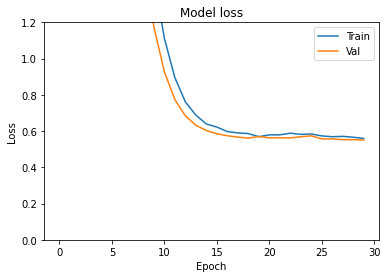

In [28]:
#VISUALIZATION OF THE TRAINING LOSS AND THE VALIDATION LOSS FOR THE MODEL
#CLEARLY, THE MODEL DOES SEEM TO PERFORM BETTER
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

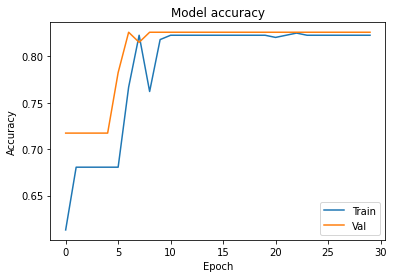

In [29]:
#VISUALIZATION OF THE TRAINING ACCURACY AND THE VALIDATION ACCURACY
#ALTHOUGH THE MODEL STILL SEEMS TO OVERFIT THE DATA, THERE IS A SIGNIFICANT IMPROVEMENT WHEN COMPARED TO THE FIRST MODEL
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
#THE MODEL ALSO REGISTERS A LOWER MEAN SQUARED ERROR COMPARED TO THE FIRST MODEL. 
#THE M.A.E IS BIGGER COMPARED TO THE 20% MAE REGISTERED BY THE SVM MODEL
mean_absolute_error(Y_val, predictions)

0.3055571405136067

In [31]:
mean_squared_error(Y_val, predictions)
math.sqrt(mean_squared_error(Y_val, predictions))

0.37492246502924537

In [32]:
np.mean(Y_val)

0.717391304347826

In [33]:
#ALSO A SIGNIFICANT IMPROVEMENT IN THE MEAN OF THE MODEL'S PREDICTION COMPARED TO THE FIRST MODEL.
np.mean(predictions)

0.6935908

In [35]:
m = metrics.Precision()
m.update_state(Y_val, predictions)
m.result().numpy()

0.8125

In [37]:
m_1 = metrics.Recall()
m_1.update_state(Y_val, predictions)
m_1.result().numpy()

0.9848485

In [137]:
loan_model_2.save('loan_determinant_ANN', save_format='tf')

INFO:tensorflow:Assets written to: loan_determinant_ANN\assets


THE ARTIFICIAL NEURAL NETWORK MODEL REGISTERED A RELATIVELY HIGHER MEAN ABSOLUTE ERROR - M.A.E, (37%) COMPARED TO THE SUPPORT VECTOR MACHINE WHICH RECORDED AN M.A.E OF 20%. THIS IMPLIES THAT THE PREDICTIONS MADE BY THE SVM ARE MUCH CLOSER TO 'REAL' VALUES COMPARED TO THE PREDICTIONS MADE BY THE A.N.N. 

HOWEVER, THE ACCURACY, PRECISION, RECALL AND F1SCORE SCORES OF THE A.N.N MODEL WERE RELATIVELY HIGHER (BETTER) THAN THOSE REGISTERED BY THE SVM MODEL. HENCE THE ANN MODEL WOULD BE A BETTER CHOICE MODEL FOR DETERMINING THE BEST SOLUTION TO THE STATEMENT PROBLEM.